In [3]:
import pandas as pd


topmoviesdf = pd.read_csv('topmovies.csv')

## Importing the neaded libraries and our data

In [4]:
print(topmoviesdf.isnull().sum())

## Metascore is the same as IMDB rating so we can probably drop it, the certificate nulls need to be looked at

Unnamed: 0        0
Movie Name        0
Certificate      15
Duration          0
Genre             0
IMDb Rating       0
Metascore       155
Director          0
Stars             0
Votes             0
Grossed in $      0
Plot              0
dtype: int64


In [5]:
print(topmoviesdf.duplicated().sum())

## No duplicates 

0


In [6]:
print(topmoviesdf[topmoviesdf['Certificate'].isnull()])

## We can see that the ones missing a certificate are all foreign films, so we can replace with something saying that



     Unnamed: 0                 Movie Name Certificate Duration  \
15           15                777 Charlie         NaN  164 min   
36           36                 Sita Ramam         NaN  163 min   
91           91                 Drishyam 2         NaN  152 min   
115         115                     Vikram         NaN  175 min   
135         135  Ayla: The Daughter of War         NaN  125 min   
334         334                     Masaan         NaN  109 min   
335         335   Her Sey Çok Güzel Olacak         NaN  107 min   
432         432         The Wild Pear Tree         NaN  188 min   
447         447           Quo Vadis, Aida?         NaN  101 min   
456         456                   G.O.R.A.         NaN  127 min   
467         467                  Vizontele         NaN  110 min   
469         469      Nefes: Vatan Sagolsun         NaN  128 min   
890         890          Perfect Strangers         NaN   96 min   
926         926                  Fireworks         NaN  103 mi

In [7]:
topmoviesdf['Certificate'].fillna('Foreign', inplace=True)
topmoviesdf= topmoviesdf.drop(['Metascore'], axis=1)
## dropping the redundant column with alot of nulls , and replacing the null certificates of foreign films


In [8]:
print(topmoviesdf.isnull().sum())

Unnamed: 0      0
Movie Name      0
Certificate     0
Duration        0
Genre           0
IMDb Rating     0
Director        0
Stars           0
Votes           0
Grossed in $    0
Plot            0
dtype: int64


In [9]:
print(topmoviesdf.dtypes)  ## Duration is a string right now and we need to change it to int

Unnamed: 0        int64
Movie Name       object
Certificate      object
Duration         object
Genre            object
IMDb Rating     float64
Director         object
Stars            object
Votes             int64
Grossed in $      int64
Plot             object
dtype: object


In [10]:
## Durations are listed as "190 min" so we need to remove the characters and change to int
## since it is always a space and then "min" we can just remove the last 4 characters

def clean_duration(row):
    return int(row[:-4])


topmoviesdf['Duration'] = topmoviesdf['Duration'].apply(clean_duration)
    

In [18]:
topmoviesdf.columns = ['index','name', 'certificate', 'duration','genre','rating','director','stars','votes','grossed','plot']
## changing column names to standardize capitalization and make it a bit clearer

In [20]:
topmoviesdf.to_csv('topmoviesclean.csv', index = False)  ## saving the processed version

Initial EDA

<Axes: xlabel='IMDb Rating', ylabel='Count'>

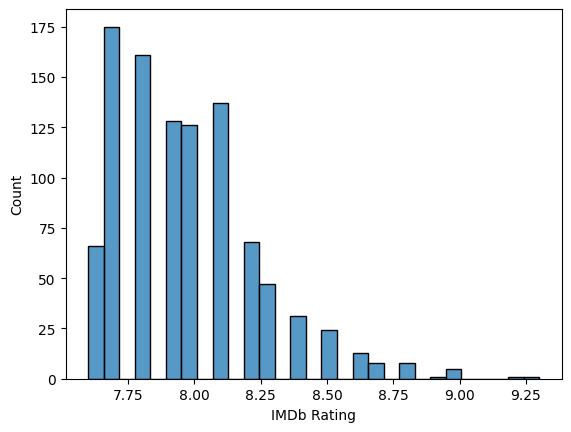

In [12]:
import seaborn as sns
import matplotlib as plt


sns.histplot(topmoviesdf['IMDb Rating'])   ## checking the rating distribution

<Axes: xlabel='Grossed in $', ylabel='Count'>

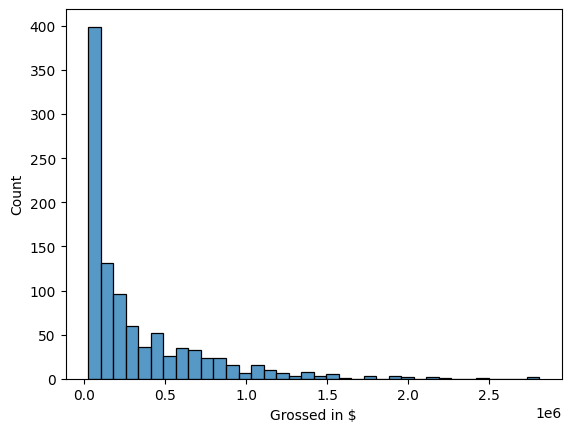

In [13]:
sns.histplot(topmoviesdf['Grossed in $'])  ## checking gross $ distribution

In [14]:
subset=topmoviesdf[['Duration','IMDb Rating','Grossed in $']]
subset.corr()
## There is a  small correlation only


,Duration,IMDb Rating,Grossed in $
Duration,1.000000,0.274100,0.162698
IMDb Rating,0.274100,1.000000,0.491154
Grossed in $,0.162698,0.491154,1.000000
